# Plotting Filter Results

This Notebook exemplifies how to plot the results of a filter applied to data using the `FilterResultsPlotting` class.

In [ ]:
from matplotlib import pyplot as plt

from eitprocessing.datahandling.loading import load_eit_data
from eitprocessing.features.rate_detection import RateDetection
from eitprocessing.filters.butterworth_filters import BandPassFilter, BandStopFilter
from eitprocessing.filters.mdn import MDNFilter
from eitprocessing.plotting.filter import FilterPlotting

MINUTE = 60

sequence = load_eit_data("example_data.bin", vendor="draeger", sample_frequency=20, label="draeger1")
eit_data = sequence.eit_data["raw"]
global_impedance = sequence.continuous_data["global_impedance_(raw)"]
sample_frequency = eit_data.sample_frequency

rd = RateDetection("adult", refine_estimated_frequency=False)
estimated_respiratory_rate, estimated_heart_rate = rd.apply(eit_data, captures=(captures := {}))

## MDN Filter 

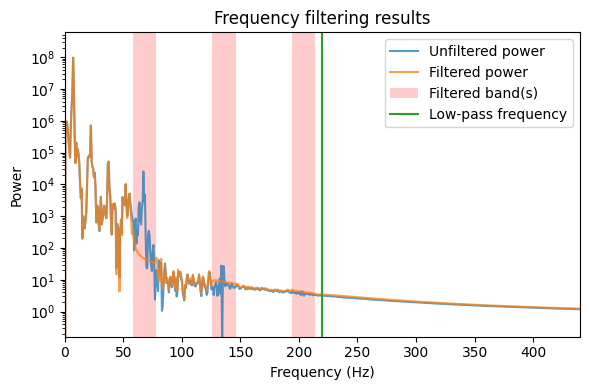

In [2]:
mdn = MDNFilter(respiratory_rate=estimated_respiratory_rate, heart_rate=estimated_heart_rate)
filtered_data = mdn.apply(global_impedance, captures=(captures := {}))

ax = mdn.plotting.plot_results(**captures)

## Band stop and band pass filters

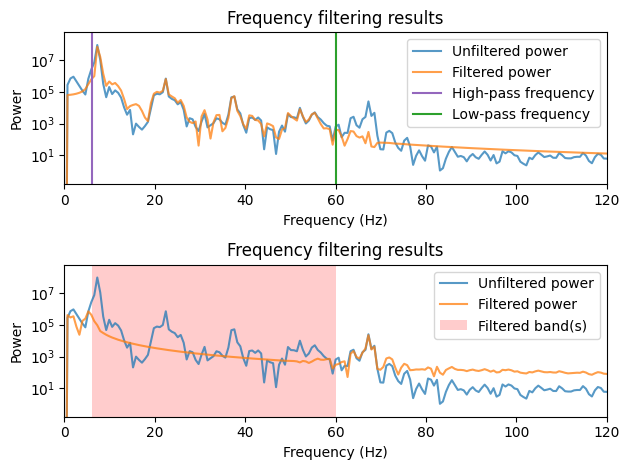

In [3]:
bp = BandPassFilter(cutoff_frequency=(0.1, 1), sample_frequency=20, order=10)
bp_filtered_data = bp.apply(global_impedance.values, captures=(captures_bp := {}))

bs = BandStopFilter(cutoff_frequency=(0.1, 1), sample_frequency=20, order=10)
bs_filtered_data = bs.apply(global_impedance.values, captures=(captures_bs := {}))

fig, axes = plt.subplots(2, 1)

FilterPlotting.plot_results(**captures_bp, ax=axes[0])
_ = FilterPlotting.plot_results(**captures_bs, ax=axes[1])